## Using Miltple Linear Regression models to predict depression levels based on daily patterns

In [ ]:
#authored by Tom Odem on 19 November 2023

### Imports

In [2]:
import modules
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [23]:
#get data with averages taken over weekly increments

X = modules.get_and_avg_data(7)
Y = modules.categorize_depression(X['depression_class']) #categorize the labels into 3 categories 0 = less than average, 1 = average, 3 = more than average
X = X.drop(columns={'depression_score', 'depression_class'}, axis=1).fillna(0) #we don't want anything depression related in our feature set

no user_tags: 501
no user_tags: 503
no user_tags: 507
no user_tags: 520
no user_tags: 523
no user_tags: 529
no user_tags: 532
no user_tags: 544
no user_tags: 547
no user_tags: 634
no user_tags: 658
no user_tags: 661
no user_tags: 662
no user_tags: 664
no user_tags: 668


For averaged user data, our data is obtained via three different file models: user_information.csv, which lists every user who participated in the study, user_tag files, which are individual files for each user that documents every action that was recorded throughout the study, and user_data files, which documents exact times that activity tags are triggered and also records the user's step amount at each tag trigger. The function get_and_avg_data() first opens the user_data file and user_tag data file for a user and computes the amount they slept, number of times they ate, number of times they drank, number of times they completed a self care act, and the amount of steps they took for everyday the user had data recorded. After getting the daily counts, the function computes averages over avg_of_n_days days, which is a user defined function parameter. This is done by selecting the first avg_of_n_days day from the daily data and computing the average of every feature. These averages, along with the user's depression information, is then appended as an individual new user to an averages dataframe. We then select the next avg_of_n_days days and compute averages , then the next, and so on until we reach the end of the recorded days. This is done for each user in which we have files for, to get a final number of 37-users-with-files * (number-of-days-recorded-for-user / avg_of_n_days) data points to train and classify with. We use 7 days for all of our models, so averages are taken over weekly incriments.

One might think, "why not average over all days for each user?" While that would be optimal, we only have 37 users who actually had retrievable data, and trying to train these big fancy models with only 37 data points would not be very productive. So, we split the data up into countless new users based on average over days. In essence, all of the new "pseudo-users" created from a single user are treated as individual users who just happen to have the same depression information. Since we are trying to find patterns in depression based on daily activity within a population, we can assume that this small population can also represent a wider range of population, which is simulated via these averages.

Instead of directly using the string categories or numeric values that measure user depression in the data, we put the labels into two different catefories: "More likely to be depressed" and "les likely to be depressed". If a user had the string depression category of "normal" or "mild", then they would be put into the category of "less likely to be depressed"(0). Any depression category above the two aforementioned categories would be labeled as "More likely to be depressed" (1). This binary category is what our model aims to predict.

In [24]:
#split up our data into trains and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 68)

In [25]:
#train and evaluate MLR using continuous data

clf = LinearRegression(fit_intercept=True) #define our multiple linear regression model
clf.fit(X_train,Y_train) #fit the line to our data
Y_pred = clf.predict(X_test) #predict the labels for the test set

#the MLR returns a continuous value, so turn them into 1's and 0's based on what is closest
Y_pred[Y_pred > .5] = 1
Y_pred[Y_pred != 1] = 0
accuracy = accuracy_score(Y_pred, Y_test.to_numpy().astype(int)) #compute the accuracy
print(f'accuracy of linear regression with continuous data: {accuracy}')

accuracy of linear regression with continuous data0.5963302752293578


We tested Multiple Linear Regression with two different forms of our features. The first form of data we tested was the unchanged continuous features that are returned from our get_and_avg_data() function. Multiple Linear Regression does not have any paramters we can optimize, so whatever line we get is the best we can get from this model. We ran the model on a training set and test set with a 90-10 split. The regression line found with using continuous data gives us an accuracy of 59.63%. Within this context, this means that given a user's average daily habits, we can predict that they are more likely or less likely to be depressed with an accuracy of 59.63%.

In [26]:
#categorize data to train a new MLR

X = X.apply(modules.categorize_column, axis=0) #categorize the features into 3 categories 0 = less than average, 1 = average, 3 = more than average

In [27]:
#split up our data into trains and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 68)

In [28]:
#train and evaluate MLR using categorical features

clf = LinearRegression(fit_intercept=True) #define the model
clf.fit(X_train,Y_train) #fit the line to our data
Y_pred = clf.predict(X_test) #predict the labels for test set

#the MLR returns a continuous value, so turn them into 1's and 0's based on what is closest
Y_pred[Y_pred > .5] = 1
Y_pred[Y_pred != 1] = 0
accuracy = accuracy_score(Y_pred, Y_test.to_numpy().astype(int)) #compute the accuracy
print(f'accuracy of linear regression with categorical data: {accuracy}')

accuracy of linear regression with categorical data0.6422018348623854


The second form of features we used to train a Multiple Linear Regression model is categorized features. Each feature datapoint was placed into one of three categories based on if it was within one standard deviation of the mean of the feature over the entire population. If a value is less than one standard deviation from the mean, it is labeled as less than average(0). If a value is greater than one standard deviation from the mean, it is labeled as greater than average(2). If a value falls within one standard deviation of the mean, then it is labeled as average(1). Using this set of categorized features, the computed regression line had an accuracy of 64.22%. This means that given a user's average daily habits, we can predict that they are more likely or less likely to be depressed with an accuracy of 64.22%. This is notably better than the model trained on the continuous values, with a 4.59% accuracy increase.

<BarContainer object of 2 artists>

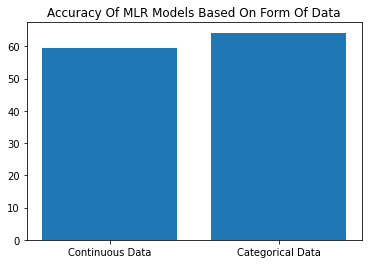

In [4]:
models = ['Continuous Data', 'Categorical Data']
accuracies = [59.63, 64.22]
plt.title('Accuracy Of MLR Models Based On Form Of Data')
plt.bar(models,accuracies)